In [1]:
from ipy import *
import PAD 
%matplotlib inline

In [2]:
#####  Oct 26, 2015 - 04:00 - 06:00
afg_file_1     = 'X:/data/ftp/mms1/afg/srvy/l2pre/2015/10/mms1_afg_srvy_l2pre_20151026_v3.11.0.cdf'
afg_file_2     = 'X:/data/ftp/mms1/afg/srvy/l2pre/2015/10/mms1_afg_srvy_l2pre_20151026_v3.14.0.cdf'

cnts_file_1    = 'X:/data/ftp/mms1/fpi/fast/l1a/des-cnts/2015/10/mms1_fpi_fast_l1a_des-cnts_20151026040000_v2.0.0.cdf'
cnts_file_2    = 'X:/data/ftp/mms1/fpi/fast/l1a/des-cnts/2015/10/mms1_fpi_fast_l1a_des-cnts_20151026040000_v2.1.0.cdf'
cnts_file_3    = 'X:/data/ftp/mms1/fpi/fast/l1a/des-cnts/2015/10/mms1_fpi_fast_l1a_des-cnts_20151026040000_v3.0.0.cdf'
cnts_file_4    = 'X:/data/ftp/mms1/fpi/fast/l1a/des-cnts/2015/10/mms1_fpi_fast_l1a_des-cnts_20151026040000_v3.1.0.cdf'

debug_file_1   = 'X:/data/ftp/mms1/fpi/fast/l2/des-debug/2015/10/mms1_fpi_fast_l2_des-debug_20151026040000_v3.0.0.cdf'
debug_file_2   = 'X:/data/ftp/mms1/fpi/fast/l2/des-debug/2015/10/mms1_fpi_fast_l2_des-debug_20151026040000_v3.1.0.cdf'

dist_file_1    = 'X:/data/ftp/mms1/fpi/fast/l2/des-dist/2015/10/mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0.cdf'
dist_file_2    = 'X:/data/ftp/mms1/fpi/fast/l2/des-dist/2015/10/mms1_fpi_fast_l2_des-dist_20151026040000_v3.0.0.cdf'
dist_file_3    = 'X:/data/ftp/mms1/fpi/fast/l2/des-dist/2015/10/mms1_fpi_fast_l2_des-dist_20151026040000_v3.1.0.cdf'

fgm_file       = 'X:/data/ftp/mms1/fgm/srvy/l2/2015/10/mms1_fgm_srvy_l2_20151026_v4.18.0.cdf'

moms_file_1    = 'X:/data/ftp/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151026040000_v2.1.0.cdf'
moms_file_2    = 'X:/data/ftp/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151026040000_v2.1.0.cdf'
moms_file_3    = 'X:/data/ftp/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151026040000_v2.1.0.cdf'

####Photoelectron correction file
photo_file     = 'C:/Yuggoth/Events/2015/mms_fpi_fast_l2_des-bgdist_v1.0.0_p0-2.cdf'

obs            = 'mms1'
ver            = 'ver2'

CDFs            = {}
CDFs['AFG1']    = pycdf.CDF(afg_file_1)
CDFs['AFG2']    = pycdf.CDF(afg_file_2)
CDFs['bfield1'] = pycdf.CDF(debug_file_1)
CDFs['bfield2'] = pycdf.CDF(debug_file_2)
CDFs['FGM']     = pycdf.CDF(fgm_file)

CDFs['cnts1']  = pycdf.CDF(cnts_file_1)
CDFs['cnts2']  = pycdf.CDF(cnts_file_2)
CDFs['cnts3']  = pycdf.CDF(cnts_file_3)
CDFs['cnts4']  = pycdf.CDF(cnts_file_4)

CDFs['dist1']  = pycdf.CDF(dist_file_1)
CDFs['dist2']  = pycdf.CDF(dist_file_2)
CDFs['dist3']  = pycdf.CDF(dist_file_3)

CDFs['moms1']  = pycdf.CDF(moms_file_1)
CDFs['moms2']  = pycdf.CDF(moms_file_2)
CDFs['moms3']  = pycdf.CDF(moms_file_3)

CDFs['photo']  = pycdf.CDF(photo_file)
date           = 'Oct 26 0400-0600'

time_format    = '%H:%M:%S'

#corrections
corrections_on = 1

# Test the magnetic field files

In [35]:
start_index = 122000
stop_index  = 236000
print 'AFG1:  ', CDFs['AFG1']['Epoch'][start_index], CDFs['AFG1']['Epoch'][stop_index]
print 'AFG2:  ', CDFs['AFG2']['Epoch'][start_index], CDFs['AFG2']['Epoch'][stop_index]
AFG1_B = CDFs['AFG1']['mms1_afg_srvy_l2pre_dmpa'][start_index:stop_index]
AFG2_B = CDFs['AFG2']['mms1_afg_srvy_l2pre_dmpa'][start_index:stop_index]
print np.min(AFG1_B-AFG2_B), np.max(AFG1_B-AFG2_B)

AFG1:   2015-10-26 04:00:29.917009 2015-10-26 05:59:15.011416
AFG2:   2015-10-26 04:00:29.917009 2015-10-26 05:59:15.011416
0.0 0.0


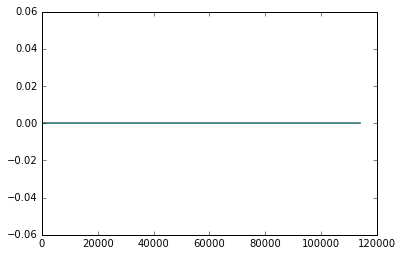

In [36]:
plt.plot(CDFs['AFG1']['mms1_afg_srvy_l2pre_dmpa'][start_index:stop_index]-\
         CDFs['AFG2']['mms1_afg_srvy_l2pre_dmpa'][start_index:stop_index])

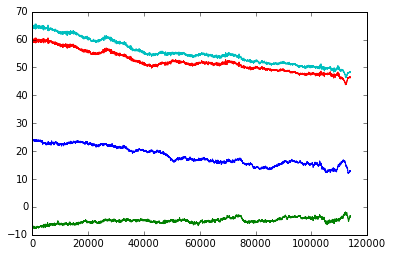

In [49]:
plt.plot(CDFs['AFG1']['mms1_afg_srvy_l2pre_dmpa'][start_index:stop_index])

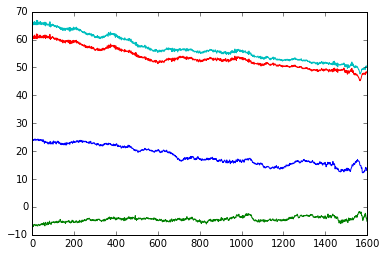

In [51]:
Bx1 = np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_X_DSC'])*\
      np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Norm'])
By1 = np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Y_DSC'])*\
      np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Norm'])
Bz1 = np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Z_DSC'])*\
      np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Norm'])   
Bn1 = np.asarray(CDFs['bfield1']['mms1_des_bentPipeB_Norm'])
plt.plot(Bx1)
plt.plot(By1)
plt.plot(Bz1)
plt.plot(Bn1)

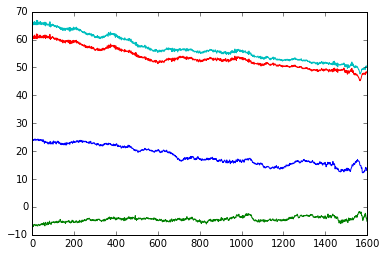

In [52]:
Bx2 = np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_X_DSC'])*\
      np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Norm'])
By2 = np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Y_DSC'])*\
      np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Norm'])
Bz2 = np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Z_DSC'])*\
      np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Norm'])   
Bn2 = np.asarray(CDFs['bfield2']['mms1_des_bentPipeB_Norm'])
plt.plot(Bx2)
plt.plot(By2)
plt.plot(Bz2)
plt.plot(Bn2)

In [53]:
print 'Bx:  ', np.min(Bx1-Bx2), np.max(Bx1-Bx2)
print 'By:  ', np.min(By1-By2), np.max(By1-By2)
print 'Bz:  ', np.min(Bz1-Bz2), np.max(Bz1-Bz2)
print 'Bn:  ', np.min(Bn1-Bn2), np.max(Bn1-Bn2)

Bx:   0.0 0.0
By:   0.0 0.0
Bz:   0.0 0.0
Bn:   0.0 0.0


# Now testing the counts

In [56]:
cnts1 = np.asarray(CDFs['cnts1']['mms1_des_fastSkyMap_cnts'][0])
cnts2 = np.asarray(CDFs['cnts1']['mms1_des_fastSkyMap_cnts'][0])
cnts3 = np.asarray(CDFs['cnts1']['mms1_des_fastSkyMap_cnts'][0])
cnts4 = np.asarray(CDFs['cnts1']['mms1_des_fastSkyMap_cnts'][0])

In [58]:
print 'cnts 1-2:  ', np.min(cnts1-cnts2), np.max(cnts1-cnts2)
print 'cnts 1-3:  ', np.min(cnts1-cnts3), np.max(cnts1-cnts3)
print 'cnts 1-4:  ', np.min(cnts1-cnts4), np.max(cnts1-cnts4)
print 'cnts 2-3:  ', np.min(cnts2-cnts3), np.max(cnts2-cnts3)
print 'cnts 2-4:  ', np.min(cnts2-cnts4), np.max(cnts2-cnts4)
print 'cnts 3-4:  ', np.min(cnts3-cnts4), np.max(cnts3-cnts4)

cnts 1-2:   0 0
cnts 1-3:   0 0
cnts 1-4:   0 0
cnts 2-3:   0 0
cnts 2-4:   0 0
cnts 3-4:   0 0


# Now testing the distributions

In [60]:
dist1 = np.asarray(CDFs['dist1']['mms1_des_dist_fast'][0])
dist2 = np.asarray(CDFs['dist2']['mms1_des_dist_fast'][0])
dist3 = np.asarray(CDFs['dist3']['mms1_des_dist_fast'][0])

In [61]:
print 'dist 1-2:  ', np.min(dist1-dist2), np.max(dist1-dist2)
print 'dist 1-3:  ', np.min(dist1-dist3), np.max(dist1-dist3)
print 'dist 2-3:  ', np.min(dist2-dist3), np.max(dist2-dist3)

dist 1-2:   -2.13996e-33 3.90461e-28
dist 1-3:   -2.13996e-33 3.90461e-28
dist 2-3:   0.0 0.0
